The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==1.0.0-alpha0


# Random Variables
:label:`sec_random_variables`

In :numref:`sec_prob` we saw the basics of how to work with discrete random variables, which in our case refer to those random variables which take either a finite set of possible values, or the integers.  In this section, we develop the theory of *continuous random variables*, which are random variables which  can take on any real value.

## Continuous Random Variables

Continuous random variables are a significantly more subtle topic than discrete random variables.  A fair analogy to make is that the technical jump is comparable to the jump between adding lists of numbers and integrating functions.  As such, we will need to take some time to develop the theory.

### From Discrete to Continuous

To understand the additional technical challenges encountered when working with continuous random variables, let's perform a thought experiment.  Suppose that we are throwing a dart at the dart board, and we want to know the probability that it hits exactly $2 \text{cm}$ from the center of the board.

To start with, we imagine measuring a single digit of accuracy, that is to say with bins for $0 \text{cm}$, $1 \text{cm}$, $2 \text{cm}$, and so on.  We throw say $100$ darts at the dart board, and if $20$ of them fall into the bin for $2\text{cm}$ we conclude that $20\%$ of the darts we throw hit the board $2 \text{cm}$ away from the center.

However, when we look closer, this does not match our question!  We wanted exact equality, whereas these bins hold all that fell between say $1.5\text{cm}$ and $2.5\text{cm}$.

Undeterred, we continue further.  We measure even more precisely, say $1.9\text{cm}$, $2.0\text{cm}$, $2.1\text{cm}$, and now see that perhaps $3$ of the $100$ darts hit the board in the $2.0\text{cm}$ bucket.  Thus we conclude the probability is $3\%$.

However, this does not solve anything!  We have just pushed the issue down one digit further.  Let's abstract a bit. Imagine we know the probability that the first $k$ digits match with $2.00000\ldots$ and we want to know the probability it matches for the first $k+1$ digits. It is fairly reasonable to assume that the ${k+1}^{\mathrm{th}}$ digit is essentially a random choice from the set $\{0, 1, 2, \ldots, 9\}$.  At least, we cannot conceive of a physically meaningful process which would force the number of micrometers away form the center to prefer to end in a $7$ vs a $3$.

What this means is that in essence each additional digit of accuracy we require should decrease probability of matching by a factor of $10$.  Or put another way, we would expect that

$$
P(\text{distance is}\; 2.00\ldots, \;\text{to}\; k \;\text{digits} ) \approx p\cdot10^{-k}.
$$

The value $p$ essentially encodes what happens with the first few digits, and the $10^{-k}$ handles the rest.

Notice that if we know the position accurate to $k=4$ digits after the decimal, that means we know the value falls within the interval say $[1.99995,2.00005]$ which is an interval of length $2.00005-1.99995 = 10^{-4}$.  Thus, if we call the length of this interval $\epsilon$, we can say

$$
P(\text{distance is in an}\; \epsilon\text{-sized interval around}\; 2 ) \approx \epsilon \cdot p.
$$

Let's take this one final step further.  We have been thinking about the point $2$ the entire time, but never thinking about other points.  Nothing is different there fundamentally, but it is the case that the value $p$ will likely be different.  We would at least hope that a dart thrower was more likely to hit a point near the center, like $2\text{cm}$ rather than $20\text{cm}$.  Thus, the value $p$ is not fixed, but rather should depend on the point $x$.  This tells us that we should expect

$$P(\text{distance is in an}\; \epsilon \text{-sized interval around}\; x ) \approx \epsilon \cdot p(x).$$
:eqlabel:`eq_pdf_deriv`

Indeed, :eqref:`eq_pdf_deriv` precisely defines the *probability density function*.  It is a function $p(x)$ which encodes the relative probability of hitting near one point vs. another.  Let's visualize what such a function might look like.


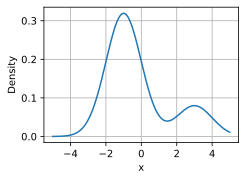

In [1]:
%matplotlib inline
import torch
from IPython import display
from d2l import torch as d2l

torch.pi = torch.acos(torch.zeros(1)).item() * 2  # Define pi in torch

# Plot the probability density function for some random variable
x = torch.arange(-5, 5, 0.01)
p = 0.2*torch.exp(-(x - 3)**2 / 2)/torch.sqrt(2 * torch.tensor(torch.pi)) + \
    0.8*torch.exp(-(x + 1)**2 / 2)/torch.sqrt(2 * torch.tensor(torch.pi))

d2l.plot(x, p, 'x', 'Density')

The locations where the function value is large indicates regions where we are more likely to find the random value.  The low portions are areas where we are unlikely to find the random value.

### Probability Density Functions

Let's now investigate this further.  We have already seen what a probability density function is intuitively for a random variable $X$, namely the density function is a function $p(x)$ so that

$$P(X \; \text{is in an}\; \epsilon \text{-sized interval around}\; x ) \approx \epsilon \cdot p(x).$$
:eqlabel:`eq_pdf_def`

But what does this imply for the properties of $p(x)$?

First, probabilities are never negative, thus we should expect that $p(x) \ge 0$ as well.

Second, let's imagine that we slice up the $\mathbb{R}$ into an infinite number of slices which are $\epsilon$ wide, say with slices $(\epsilon\cdot i, \epsilon \cdot (i+1)]$.  For each of these, we know from :eqref:`eq_pdf_def` the probability is approximately

$$
P(X \; \text{is in an}\; \epsilon\text{-sized interval around}\; x ) \approx \epsilon \cdot p(\epsilon \cdot i),
$$

so summed over all of them it should be

$$
P(X\in\mathbb{R}) \approx \sum_i \epsilon \cdot p(\epsilon\cdot i).
$$

This is nothing more than the approximation of an integral discussed in :numref:`sec_integral_calculus`, thus we can say that

$$
P(X\in\mathbb{R}) = \int_{-\infty}^{\infty} p(x) \; dx.
$$

We know that $P(X\in\mathbb{R}) = 1$, since the random variable must take on *some* number, we can conclude that for any density

$$
\int_{-\infty}^{\infty} p(x) \; dx = 1.
$$

Indeed, digging into this further shows that for any $a$, and $b$, we see that

$$
P(X\in(a, b]) = \int _ {a}^{b} p(x) \; dx.
$$

We may approximate this in code by using the same discrete approximation methods as before.  In this case we can approximate the probability of falling in the blue region.


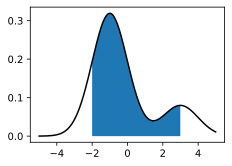

'approximate Probability: 0.773617148399353'

In [2]:
# Approximate probability using numerical integration
epsilon = 0.01
x = torch.arange(-5, 5, 0.01)
p = 0.2*torch.exp(-(x - 3)**2 / 2) / torch.sqrt(2 * torch.tensor(torch.pi)) +\
    0.8*torch.exp(-(x + 1)**2 / 2) / torch.sqrt(2 * torch.tensor(torch.pi))

d2l.set_figsize()
d2l.plt.plot(x, p, color='black')
d2l.plt.fill_between(x.tolist()[300:800], p.tolist()[300:800])
d2l.plt.show()

f'approximate Probability: {torch.sum(epsilon*p[300:800])}'

It turns out that these two properties describe exactly the space of possible probability density functions (or *p.d.f.*'s for the commonly encountered abbreviation).  They are non-negative functions $p(x) \ge 0$ such that

$$\int_{-\infty}^{\infty} p(x) \; dx = 1.$$
:eqlabel:`eq_pdf_int_one`

We interpret this function by using integration to obtain the probability our random variable is in a specific interval:

$$P(X\in(a, b]) = \int _ {a}^{b} p(x) \; dx.$$
:eqlabel:`eq_pdf_int_int`

In :numref:`sec_distributions` we will see a number of common distributions, but let's continue working in the abstract.

### Cumulative Distribution Functions

In the previous section, we saw the notion of the p.d.f.  In practice, this is a commonly encountered method to discuss continuous random variables, but it has one significant pitfall: that the values of the p.d.f. are not themselves probabilities, but rather a function that we must integrate to yield probabilities.  There is nothing wrong with a density being larger than $10$, as long as it is not larger than $10$ for more than an interval of length $1/10$.  This can be counter-intuitive, so people often also think in terms of the *cumulative distribution function*, or c.d.f., which *is* a probability.

In particular, by using :eqref:`eq_pdf_int_int`, we define the c.d.f. for a random variable $X$ with density $p(x)$ by

$$
F(x) = \int _ {-\infty}^{x} p(x) \; dx = P(X \le x).
$$

Let's observe a few properties.

* $F(x) \rightarrow 0$ as $x\rightarrow -\infty$.
* $F(x) \rightarrow 1$ as $x\rightarrow \infty$.
* $F(x)$ is non-decreasing ($y > x \implies F(y) \ge F(x)$).
* $F(x)$ is continuous (has no jumps) if $X$ is a continuous random variable.

With the fourth bullet point, note that this would not be true if $X$ were discrete, say taking the values $0$ and $1$ both with probability $1/2$.  In that case

$$
F(x) = \begin{cases}
0 & x < 0, \\
\frac{1}{2} & x < 1, \\
1 & x \ge 1.
\end{cases}
$$

In this example, we see one of the benefits of working with the c.d.f., the ability to deal with continuous or discrete random variables in the same framework, or indeed mixtures of the two (flip a coin: if heads return the roll of a die, if tails return the distance of a dart throw from the center of a dart board).

### Means

Suppose that we are dealing with a random variables $X$.  The distribution itself can be hard to interpret.  It is often useful to be able to summarize the behavior of a random variable concisely.  Numbers that help us capture the behavior of a random variable are called *summary statistics*.  The most commonly encountered ones are the *mean*, the *variance*, and the *standard deviation*.

The *mean* encodes the average value of a random variable.  If we have a discrete random variable $X$, which takes the values $x_i$ with probabilities $p_i$, then the mean is given by the weighted average: sum the values times the probability that the random variable takes on that value:

$$\mu_X = E[X] = \sum_i x_i p_i.$$
:eqlabel:`eq_exp_def`

The way we should interpret the mean (albeit with caution) is that it tells us essentially where the random variable tends to be located.

As a minimalistic example that we will examine throughout this section, let's take $X$ to be the random variable which takes the value $a-2$ with probability $p$, $a+2$ with probability $p$ and $a$ with probability $1-2p$.  We can compute using :eqref:`eq_exp_def` that, for any possible choice of $a$ and $p$, the mean is

$$
\mu_X = E[X] = \sum_i x_i p_i = (a-2)p + a(1-2p) + (a+2)p = a.
$$

Thus we see that the mean is $a$.  This matches the intuition since $a$ is the location around which we centered our random variable.

Because they are helpful, let's summarize a few properties.

* For any random variable $X$ and numbers $a$ and $b$, we have that $\mu_{aX+b} = a\mu_X + b$.
* If we have two random variables $X$ and $Y$, we have $\mu_{X+Y} = \mu_X+\mu_Y$.

Means are useful for understanding the average behavior of a random variable, however the mean is not sufficient to even have a full intuitive understanding.  Making a profit of $\$10 \pm \$1$ per sale is very different from making $\$10 \pm \$15$ per sale despite having the same average value.  The second one has a much larger degree of fluctuation, and thus represents a much larger risk.  Thus, to understand the behavior of a random variable, we will need at minimum one more measure: some measure of how widely a random variable fluctuates.

### Variances

This leads us to consider the *variance* of a random variable.  This is a quantitative measure of how far a random variable deviates from the mean.  Consider the expression $X - \mu_X$.  This is the deviation of the random variable from its mean.  This value can be positive or negative, so we need to do something to make it positive so that we are measuring the magnitude of the deviation.

A reasonable thing to try is to look at $\left|X-\mu_X\right|$, and indeed this leads to a useful quantity called the *mean absolute deviation*, however due to connections with other areas of mathematics and statistics, people often use a different solution.

In particular, they look at $(X-\mu_X)^2.$  If we look at the typical size of this quantity by taking the mean, we arrive at the variance

$$\sigma_X^2 = \mathrm{Var}(X) = E\left[(X-\mu_X)^2\right] = E[X^2] - \mu_X^2.$$
:eqlabel:`eq_var_def`

The last equality in :eqref:`eq_var_def` holds by expanding out the definition in the middle, and applying the properties of expectation.

Let's look at our example where $X$ is the random variable which takes the value $a-2$ with probability $p$, $a+2$ with probability $p$ and $a$ with probability $1-2p$.  In this case $\mu_X = a$, so all we need to compute is $E\left[X^2\right]$.  This can readily be done:

$$
E\left[X^2\right] = (a-2)^2p + a^2(1-2p) + (a+2)^2p = a^2 + 8p.
$$

Thus, we see that by :eqref:`eq_var_def` our variance is

$$
\sigma_X^2 = \mathrm{Var}(X) = E[X^2] - \mu_X^2 = a^2 + 8p - a^2 = 8p.
$$

This result again makes sense.  The largest $p$ can be is $1/2$ which corresponds to picking $a-2$ or $a+2$ with a coin flip.  The variance of this being $4$ corresponds to the fact that both $a-2$ and $a+2$ are $2$ units away from the mean, and $2^2 = 4$.  On the other end of the spectrum, if $p=0$, this random variable always takes the value $0$ and so it has no variance at all.

We will list a few properties of variance below:

* For any random variable $X$, $\mathrm{Var}(X) \ge 0$, with $\mathrm{Var}(X) = 0$ if and only if $X$ is a constant.
* For any random variable $X$ and numbers $a$ and $b$, we have that $\mathrm{Var}(aX+b) = a^2\mathrm{Var}(X)$.
* If we have two *independent* random variables $X$ and $Y$, we have $\mathrm{Var}(X+Y) = \mathrm{Var}(X) + \mathrm{Var}(Y)$.

When interpreting these values, there can be a bit of a hiccup.  In particular, let's try imagining what happens if we keep track of units through this computation.  Suppose that we are working with the star rating assigned to a product on the web page.  Then $a$, $a-2$, and $a+2$ are all measured in units of stars.  Similarly, the mean $\mu_X$ is then also measured in stars (being a weighted average).  However, if we get to the variance, we immediately encounter an issue, which is we want to look at $(X-\mu_X)^2$, which is in units of *squared stars*.  This means that the variance itself is not comparable to the original measurements.  To make it interpretable, we will need to return to our original units.

### Standard Deviations

This summary statistics can always be deduced from the variance by taking the square root!  Thus we define the *standard deviation* to be

$$
\sigma_X = \sqrt{\mathrm{Var}(X)}.
$$

In our example, this means we now have the standard deviation is $\sigma_X = 2\sqrt{2p}$.  If we are dealing with units of stars for our review example, $\sigma_X$ is again in units of stars.

The properties we had for the variance can be restated for the standard deviation.

* For any random variable $X$, $\sigma_{X} \ge 0$.
* For any random variable $X$ and numbers $a$ and $b$, we have that $\sigma_{aX+b} = |a|\sigma_{X}$
* If we have two *independent* random variables $X$ and $Y$, we have $\sigma_{X+Y} = \sqrt{\sigma_{X}^2 + \sigma_{Y}^2}$.

It is natural at this moment to ask, "If the standard deviation is in the units of our original random variable, does it represent something we can draw with regards to that random variable?"  The answer is a resounding yes!  Indeed much like the mean told us the typical location of our random variable, the standard deviation gives the typical range of variation of that random variable.  We can make this rigorous with what is known as Chebyshev's inequality:

$$P\left(X \not\in [\mu_X - \alpha\sigma_X, \mu_X + \alpha\sigma_X]\right) \le \frac{1}{\alpha^2}.$$
:eqlabel:`eq_chebyshev`

Or to state it verbally in the case of $\alpha=10$, $99\%$ of the samples from any random variable fall within $10$ standard deviations of the mean.  This gives an immediate interpretation to our standard summary statistics.

To see how this statement is rather subtle, let's take a look at our running example again where  $X$ is the random variable which takes the value $a-2$ with probability $p$, $a+2$ with probability $p$ and $a$ with probability $1-2p$.  We saw that the mean was $a$ and the standard deviation was $2\sqrt{2p}$.  This means, if we take Chebyshev's inequality :eqref:`eq_chebyshev` with $\alpha = 2$, we see that the expression is

$$
P\left(X \not\in [a - 4\sqrt{2p}, a + 4\sqrt{2p}]\right) \le \frac{1}{4}.
$$

This means that $75\%$ of the time, this random variable will fall within this interval for any value of $p$.  Now, notice that as $p \rightarrow 0$, this interval also converges to the single point $a$.  But we know that our random variable takes the values $a-2, a$, and $a+2$ only so eventually we can be certain $a-2$ and $a+2$ will fall outside the interval!  The question is, at what $p$ does that happen.  So we want to solve: for what $p$ does $a+4\sqrt{2p} = a+2$, which is solved when $p=1/8$, which is *exactly* the first $p$ where it could possibly happen without violating our claim that no more than $1/4$ of samples from the distribution would fall outside the interval ($1/8$ to the left, and $1/8$ to the right).

Let's visualize this.  We will show the probability of getting the three values as three vertical bars with height proportional to the probability.  The interval will be drawn as a horizontal line in the middle.  The first plot shows what happens for $p > 1/8$ where the interval safely contains all points.


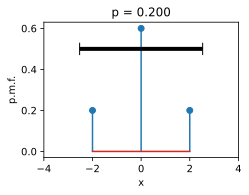

In [3]:
# Define a helper to plot these figures
def plot_chebyshev(a, p):
    d2l.set_figsize()
    d2l.plt.stem([a-2, a, a+2], [p, 1-2*p, p], use_line_collection=True)
    d2l.plt.xlim([-4, 4])
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('p.m.f.')

    d2l.plt.hlines(0.5, a - 4 * torch.sqrt(2 * p),
                   a + 4 * torch.sqrt(2 * p), 'black', lw=4)
    d2l.plt.vlines(a - 4 * torch.sqrt(2 * p), 0.53, 0.47, 'black', lw=1)
    d2l.plt.vlines(a + 4 * torch.sqrt(2 * p), 0.53, 0.47, 'black', lw=1)
    d2l.plt.title(f'p = {p:.3f}')

    d2l.plt.show()

# Plot interval when p > 1/8
plot_chebyshev(0.0, torch.tensor(0.2))

The second shows that at $p = 1/8$, the interval exactly touches the two points.  This shows that the inequality is *sharp*, since no smaller interval could be taken while keeping the inequality true.


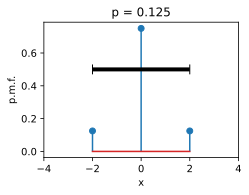

In [4]:
# Plot interval when p = 1/8
plot_chebyshev(0.0, torch.tensor(0.125))

The third shows that for $p < 1/8$ the interval only contains the center.  This does not invalidate the inequality since we only needed to ensure that no more than $1/4$ of the probability falls outside the interval, which means that once $p < 1/8$, the two points at $a-2$ and $a+2$ can be discarded.


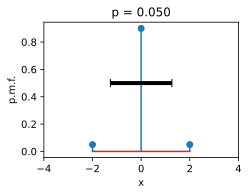

In [5]:
# Plot interval when p < 1/8
plot_chebyshev(0.0, torch.tensor(0.05))

### Means and Variances in the Continuum

This has all been in terms of discrete random variables, but the case of continuous random variables is similar.  To intuitively understand how this works, imagine that we split the real number line into intervals of length $\epsilon$ given by $(\epsilon i, \epsilon (i+1)]$.  Once we do this, our continuous random variable has been made discrete and we can use :eqref:`eq_exp_def` say that

$$
\begin{aligned}
\mu_X & \approx \sum_{i} (\epsilon i)P(X \in (\epsilon i, \epsilon (i+1)]) \\
& \approx \sum_{i} (\epsilon i)p_X(\epsilon i)\epsilon, \\
\end{aligned}
$$

where $p_X$ is the density of $X$.  This is an approximation to the integral of $xp_X(x)$, so we can conclude that

$$
\mu_X = \int_{-\infty}^\infty xp_X(x) \; dx.
$$

Similarly, using :eqref:`eq_var_def` the variance can be written as

$$
\sigma^2_X = E[X^2] - \mu_X^2 = \int_{-\infty}^\infty x^2p_X(x) \; dx - \left(\int_{-\infty}^\infty xp_X(x) \; dx\right)^2.
$$

Everything stated above about the mean, the variance, and the standard deviation still applies in this case.  For instance, if we consider the random variable with density

$$
p(x) = \begin{cases}
1 & x \in [0,1], \\
0 & \text{otherwise}.
\end{cases}
$$

we can compute

$$
\mu_X = \int_{-\infty}^\infty xp(x) \; dx = \int_0^1 x \; dx = \frac{1}{2}.
$$

and

$$
\sigma_X^2 = \int_{-\infty}^\infty x^2p(x) \; dx - \left(\frac{1}{2}\right)^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12}.
$$

As a warning, let's examine one more example, known as the *Cauchy distribution*.  This is the distribution with p.d.f. given by

$$
p(x) = \frac{1}{1+x^2}.
$$


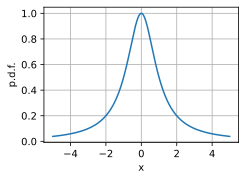

In [6]:
# Plot the Cauchy distribution p.d.f.
x = torch.arange(-5, 5, 0.01)
p = 1 / (1 + x**2)

d2l.plot(x, p, 'x', 'p.d.f.')

This function looks innocent, and indeed consulting a table of integrals will show it has area one under it, and thus it defines a continuous random variable.

To see what goes astray, let's try to compute the variance of this.  This would involve using :eqref:`eq_var_def` computing

$$
\int_{-\infty}^\infty \frac{x^2}{1+x^2}\; dx.
$$

The function on the inside looks like this:


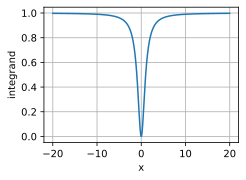

In [7]:
# Plot the integrand needed to compute the variance
x = torch.arange(-20, 20, 0.01)
p = x**2 / (1 + x**2)

d2l.plot(x, p, 'x', 'integrand')

This function clearly has infinite area under it since it is essentially the constant one with a small dip near zero, and indeed we could show that

$$
\int_{-\infty}^\infty \frac{x^2}{1+x^2}\; dx = \infty.
$$

This means it does not have a well-defined finite variance.

However, looking deeper shows an even more disturbing result.  Let's try to compute the mean using :eqref:`eq_exp_def`.  Using the change of variables formula, we see

$$
\mu_X = \int_{-\infty}^{\infty} \frac{x}{1+x^2} \; dx = \frac{1}{2}\int_1^\infty \frac{1}{u} \; du.
$$

The integral inside is the definition of the logarithm, so this is in essence $\log(\infty) = \infty$, so there is no well-defined average value either!

Machine learning scientists define their models so that we most often do not need to deal with these issues, and will in the vast majority of cases deal with random variables with well-defined means and variances.  However, every so often random variables with *heavy tails* (that is those random variables where the probabilities of getting large values are large enough to make things like the mean or variance undefined) are helpful in modeling physical systems, thus it is worth knowing that they exist.

### Joint Density Functions

The above work all assumes we are working with a single real valued random variable.  But what if we are dealing with two or more potentially highly correlated random variables?  This circumstance is the norm in machine learning: imagine random variables like $R_{i, j}$ which encode the red value of the pixel at the $(i, j)$ coordinate in an image, or $P_t$ which is a random variable given by a stock price at time $t$.  Nearby pixels tend to have similar color, and nearby times tend to have similar prices.  We cannot treat them as separate random variables, and expect to create a successful model (we will see in :numref:`sec_naive_bayes` a model that under-performs due to such an assumption).  We need to develop the mathematical language to handle these correlated continuous random variables.

Thankfully, with the multiple integrals in :numref:`sec_integral_calculus` we can develop such a language.  Suppose that we have, for simplicity, two random variables $X, Y$ which can be correlated.  Then, similar to the case of a single variable, we can ask the question:

$$
P(X \;\text{is in an}\; \epsilon \text{-sized interval around}\; x \; \text{and} \;Y \;\text{is in an}\; \epsilon \text{-sized interval around}\; y ).
$$

Similar reasoning to the single variable case shows that this should be approximately

$$
P(X \;\text{is in an}\; \epsilon \text{-sized interval around}\; x \; \text{and} \;Y \;\text{is in an}\; \epsilon \text{-sized interval around}\; y ) \approx \epsilon^{2}p(x, y),
$$

for some function $p(x, y)$.  This is referred to as the joint density of $X$ and $Y$.  Similar properties are true for this as we saw in the single variable case. Namely:

* $p(x, y) \ge 0$;
* $\int _ {\mathbb{R}^2} p(x, y) \;dx \;dy = 1$;
* $P((X, Y) \in \mathcal{D}) = \int _ {\mathcal{D}} p(x, y) \;dx \;dy$.

In this way, we can deal with multiple, potentially correlated random variables.  If we wish to work with more than two random variables, we can extend the multivariate density to as many coordinates as desired by considering $p(\mathbf{x}) = p(x_1, \ldots, x_n)$.  The same properties of being non-negative, and having total integral of one still hold.

### Marginal Distributions
When dealing with multiple variables, we oftentimes want to be able to ignore the relationships and ask, "how is this one variable distributed?"  Such a distribution is called a *marginal distribution*.

To be concrete, let's suppose that we have two random variables $X, Y$ with joint density given by $p _ {X, Y}(x, y)$.  We will be using the subscript to indicate what random variables the density is for.  The question of finding the marginal distribution is taking this function, and using it to find $p _ X(x)$.

As with most things, it is best to return to the intuitive picture to figure out what should be true.  Recall that the density is the function $p _ X$ so that

$$
P(X \in [x, x+\epsilon]) \approx \epsilon \cdot p _ X(x).
$$

There is no mention of $Y$, but if all we are given is $p _{X, Y}$, we need to include $Y$ somehow. We can first observe that this is the same as

$$
P(X \in [x, x+\epsilon] \text{, and } Y \in \mathbb{R}) \approx \epsilon \cdot p _ X(x).
$$

Our density does not directly tell us about what happens in this case, we need to split into small intervals in $y$ as well, so we can write this as

$$
\begin{aligned}
\epsilon \cdot p _ X(x) & \approx \sum _ {i} P(X \in [x, x+\epsilon] \text{, and } Y \in [\epsilon \cdot i, \epsilon \cdot (i+1)]) \\
& \approx \sum _ {i} \epsilon^{2} p _ {X, Y}(x, \epsilon\cdot i).
\end{aligned}
$$

![By summing along the columns of our array of probabilities, we are able to obtain the marginal distribution for just the random variable represented along the $x$-axis.](http://d2l.ai/_images/marginal.svg)
:label:`fig_marginal`

This tells us to add up the value of the density along a series of squares in a line as is shown in :numref:`fig_marginal`.  Indeed, after canceling one factor of epsilon from both sides, and recognizing the sum on the right is the integral over $y$, we can conclude that

$$
\begin{aligned}
 p _ X(x) &  \approx \sum _ {i} \epsilon p _ {X, Y}(x, \epsilon\cdot i) \\
 & \approx \int_{-\infty}^\infty p_{X, Y}(x, y) \; dy.
\end{aligned}
$$

Thus we see

$$
p _ X(x) = \int_{-\infty}^\infty p_{X, Y}(x, y) \; dy.
$$

This tells us that to get a marginal distribution, we integrate over the variables we do not care about.  This process is often referred to as *integrating out* or *marginalized out* the unneeded variables.

### Covariance

When dealing with multiple random variables, there is one additional summary statistic which is helpful to know: the *covariance*.  This measures the degree that two random variable fluctuate together.

Suppose that we have two random variables $X$ and $Y$, to begin with, let's suppose they are discrete, taking on values $(x_i, y_j)$ with probability $p_{ij}$.  In this case, the covariance is defined as

$$\sigma_{XY} = \mathrm{Cov}(X, Y) = \sum_{i, j} (x_i - \mu_X) (y_j-\mu_Y) p_{ij}. = E[XY] - E[X]E[Y].$$
:eqlabel:`eq_cov_def`

To think about this intuitively: consider the following pair of random variables.  Suppose that $X$ takes the values $1$ and $3$, and $Y$ takes the values $-1$ and $3$.  Suppose that we have the following probabilities

$$
\begin{aligned}
P(X = 1 \; \text{and} \; Y = -1) & = \frac{p}{2}, \\
P(X = 1 \; \text{and} \; Y = 3) & = \frac{1-p}{2}, \\
P(X = 3 \; \text{and} \; Y = -1) & = \frac{1-p}{2}, \\
P(X = 3 \; \text{and} \; Y = 3) & = \frac{p}{2},
\end{aligned}
$$

where $p$ is a parameter in $[0,1]$ we get to pick.  Notice that if $p=1$ then they are both always their minimum or maximum values simultaneously, and if $p=0$ they are guaranteed to take their flipped values simultaneously (one is large when the other is small and vice versa).  If $p=1/2$, then the four possibilities are all equally likely, and neither should be related.  Let's compute the covariance.  First, note $\mu_X = 2$ and $\mu_Y = 1$, so we may compute using :eqref:`eq_cov_def`:

$$
\begin{aligned}
\mathrm{Cov}(X, Y) & = \sum_{i, j} (x_i - \mu_X) (y_j-\mu_Y) p_{ij} \\
& = (1-2)(-1-1)\frac{p}{2} + (1-2)(3-1)\frac{1-p}{2} + (3-2)(-1-1)\frac{1-p}{2} + (3-2)(3-1)\frac{p}{2} \\
& = 4p-2.
\end{aligned}
$$

When $p=1$ (the case where they are both maximally positive or negative at the same time) has a covariance of $2$. When $p=0$ (the case where they are flipped) the covariance is $-2$.  Finally, when $p=1/2$ (the case where they are unrelated), the covariance is $0$.  Thus we see that the covariance measures how these two random variables are related.

A quick note on the covariance is that it only measures these linear relationships.  More complex relationships like $X = Y^2$ where $Y$ is randomly chosen from $\{-2, -1, 0, 1, 2\}$ with equal probability can be missed.  Indeed a quick computation shows that these random variables have covariance zero, despite one being a deterministic function of the other.

For continuous random variables, much the same story holds.  At this point, we are pretty comfortable with doing the transition between discrete and continuous, so we will provide the continuous analogue of :eqref:`eq_cov_def` without any derivation.

$$
\sigma_{XY} = \int_{\mathbb{R}^2} (x-\mu_X)(y-\mu_Y)p(x, y) \;dx \;dy.
$$

For visualization, let's take a look at a collection of random variables with tunable covariance.


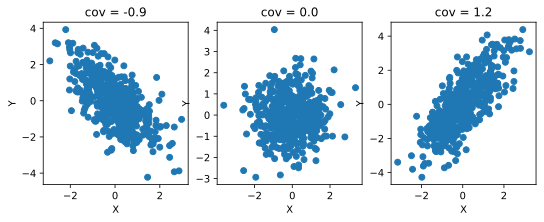

In [8]:
# Plot a few random variables adjustable covariance
covs = [-0.9, 0.0, 1.2]
d2l.plt.figure(figsize=(12, 3))
for i in range(3):
    X = torch.randn(500)
    Y = covs[i]*X + torch.randn(500)

    d2l.plt.subplot(1, 4, i+1)
    d2l.plt.scatter(X.numpy(), Y.numpy())
    d2l.plt.xlabel('X')
    d2l.plt.ylabel('Y')
    d2l.plt.title(f'cov = {covs[i]}')
d2l.plt.show()

Let's see some properties of covariances:

* For any random variable $X$, $\mathrm{Cov}(X, X) = \mathrm{Var}(X)$.
* For any random variables $X, Y$ and numbers $a$ and $b$, $\mathrm{Cov}(aX+b, Y) = \mathrm{Cov}(X, aY+b) = a\mathrm{Cov}(X, Y)$.
* If $X$ and $Y$ are independent then $\mathrm{Cov}(X, Y) = 0$.

In addition, we can use the covariance to expand a relationship we saw before.  Recall that is $X$ and $Y$ are two independent random variables then

$$
\mathrm{Var}(X+Y) = \mathrm{Var}(X) + \mathrm{Var}(Y).
$$

With knowledge of covariances, we can expand this relationship.  Indeed, some algebra can show that in general,

$$
\mathrm{Var}(X+Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) + 2\mathrm{Cov}(X, Y).
$$

This allows us to generalize the variance summation rule for correlated random variables.

### Correlation

As we did in the case of means and variances, let's now consider units.  If $X$ is measured in one unit (say inches), and $Y$ is measured in another (say dollars), the covariance is measured in the product of these two units $\text{inches} \times \text{dollars}$.  These units can be hard to interpret.  What we will often want in this case is a unit-less measurement of relatedness.  Indeed, often we do not care about exact quantitative correlation, but rather ask if the correlation is in the same direction, and how strong the relationship is.

To see what makes sense, let's perform a thought experiment.  Suppose that we convert our random variables in inches and dollars to be in inches and cents.  In this case the random variable $Y$ is multiplied by $100$.  If we work through the definition, this means that $\mathrm{Cov}(X, Y)$ will be multiplied by $100$.  Thus we see that in this case a change of units change the covariance by a factor of $100$.  Thus, to find our unit-invariant measure of correlation, we will need to divide by something else that also gets scaled by $100$.  Indeed we have a clear candidate, the standard deviation!  Indeed if we define the *correlation coefficient* to be

$$\rho(X, Y) = \frac{\mathrm{Cov}(X, Y)}{\sigma_{X}\sigma_{Y}},$$
:eqlabel:`eq_cor_def`

we see that this is a unit-less value.  A little mathematics can show that this number is between $-1$ and $1$ with $1$ meaning maximally positively correlated, whereas $-1$ means maximally negatively correlated.

Returning to our explicit discrete example above, we can see that $\sigma_X = 1$ and $\sigma_Y = 2$, so we can compute the correlation between the two random variables using :eqref:`eq_cor_def` to see that

$$
\rho(X, Y) = \frac{4p-2}{1\cdot 2} = 2p-1.
$$

This now ranges between $-1$ and $1$ with the expected behavior of $1$ meaning most correlated, and $-1$ meaning minimally correlated.

As another example, consider $X$ as any random variable, and $Y=aX+b$ as any linear deterministic function of $X$.  Then, one can compute that

$$\sigma_{Y} = \sigma_{aX+b} = |a|\sigma_{X},$$

$$\mathrm{Cov}(X, Y) = \mathrm{Cov}(X, aX+b) = a\mathrm{Cov}(X, X) = a\mathrm{Var}(X),$$

and thus by :eqref:`eq_cor_def` that

$$
\rho(X, Y) = \frac{a\mathrm{Var}(X)}{|a|\sigma_{X}^2} = \frac{a}{|a|} = \mathrm{sign}(a).
$$

Thus we see that the correlation is $+1$ for any $a > 0$, and $-1$ for any $a < 0$ illustrating that correlation measures the degree and directionality the two random variables are related, not the scale that the variation takes.

Let's again plot a collection of random variables with tunable correlation.


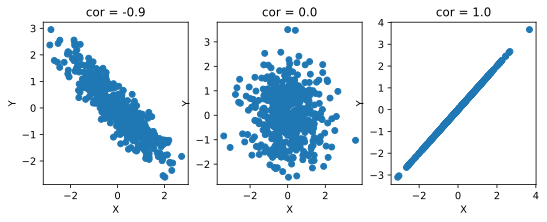

In [9]:
# Plot a few random variables adjustable correlations
cors = [-0.9, 0.0, 1.0]
d2l.plt.figure(figsize=(12, 3))
for i in range(3):
    X = torch.randn(500)
    Y = cors[i] * X + torch.sqrt(torch.tensor(1) -
                                 cors[i]**2) * torch.randn(500)

    d2l.plt.subplot(1, 4, i + 1)
    d2l.plt.scatter(X.numpy(), Y.numpy())
    d2l.plt.xlabel('X')
    d2l.plt.ylabel('Y')
    d2l.plt.title(f'cor = {cors[i]}')
d2l.plt.show()

Let's list a few properties of the correlation below.

* For any random variable $X$, $\rho(X, X) = 1$.
* For any random variables $X, Y$ and numbers $a$ and $b$, $\rho(aX+b, Y) = \rho(X, aY+b) = \rho(X, Y)$.
* If $X$ and $Y$ are independent with non-zero variance then $\rho(X, Y) = 0$.

As a final note, you may feel like some of these formulae are familiar.  Indeed, if we expand everything out assuming that $\mu_X = \mu_Y = 0$, we see that this is

$$
\rho(X, Y) = \frac{\sum_{i, j} x_iy_ip_{ij}}{\sqrt{\sum_{i, j}x_i^2 p_{ij}}\sqrt{\sum_{i, j}y_j^2 p_{ij}}}.
$$

This looks like a sum of a product of terms divided by the square root of sums of terms.  This is exactly the formula for the cosine of the angle between two vectors $\mathbf{v}, \mathbf{w}$ with the different coordinates weighted by $p_{ij}$:

$$
\cos(\theta) = \frac{\mathbf{v}\cdot \mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|} = \frac{\sum_{i} v_iw_i}{\sqrt{\sum_{i}v_i^2}\sqrt{\sum_{i}w_i^2}}.
$$

Indeed if we think of norms as being related to standard deviations, and correlations as being cosines of angles, much of the intuition we have from geometry can be applied to thinking about random variables.

## Summary
* Continuous random variables are random variables that can take on a continuum of values.  They have some technical difficulties that make them more challenging to work with compared to discrete random variables.
* The probability density function allows us to work with continuous random variables by giving a function where the area under the curve on some interval gives the probability of finding a sample point in that interval.
* The cumulative distribution function is the probability of observing the random variable to be less than a given threshold.  It can provide a useful alternate viewpoint which unifies discrete and continuous variables.
* The mean is the average value of a random variable.
* The variance is the expected square of the difference between the random variable and its mean.
* The standard deviation is the square root of the variance.  It can be thought of as measuring the range of values the random variable may take.
* Chebyshev's inequality allows us to make this intuition rigorous by giving an explicit interval that contains the random variable most of the time.
* Joint densities allow us to work with correlated random variables.  We may marginalize joint densities by integrating over unwanted random variables to get the distribution of the desired random variable.
* The covariance and correlation coefficient provide a way to measure any linear relationship between two correlated random variables.

## Exercises
1. Suppose that we have the random variable with density given by $p(x) = \frac{1}{x^2}$ for $x \ge 1$ and $p(x) = 0$ otherwise.  What is $P(X > 2)$?
2. The Laplace distribution is a random variable whose density is given by $p(x = \frac{1}{2}e^{-|x|}$.  What is the mean and the standard deviation of this function?  As a hint, $\int_0^\infty xe^{-x} \; dx = 1$ and $\int_0^\infty x^2e^{-x} \; dx = 2$.
3. I walk up to you on the street and say "I have a random variable with mean $1$, standard deviation $2$, and I observed $25\%$ of my samples taking a value larger than $9$."  Do you believe me?  Why or why not?
4. Suppose that you have two random variables $X, Y$, with joint density given by $p_{XY}(x, y) = 4xy$ for $x, y \in [0,1]$ and $p_{XY}(x, y) = 0$ otherwise.  What is the covariance of $X$ and $Y$?


[Discussions](https://discuss.d2l.ai/t/1094)
